# Lab 9: Анализ шума 


In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import itertools

from scipy.io import wavfile
from scipy import signal
from tqdm import tqdm

dpi = 1000

In [2]:
def spectrogram(samples, sample_rate, filename):
    freq, t, spec = signal.spectrogram(samples, sample_rate, scaling='spectrum', window=('hann'))

    spec = np.log10(spec + 1)
    plt.pcolormesh(t, freq, spec, shading='gouraud', vmin=spec.min(), vmax=spec.max())
    plt.ylabel('Частота [Гц]')
    plt.xlabel('Время [с]')

    plt.savefig(filename)

    return freq, t, spec

In [3]:
def make_butter_filter(sample_rate, data, output_path):
    b, a = signal.butter(10, 0.1, btype='lowpass')
    filtered_signal = signal.filtfilt(b, a, data)
    wavfile.write(output_path + '/' + 'butter.wav', sample_rate, filtered_signal.astype(np.int16))
    spectrogram(filtered_signal, sample_rate, output_path + '/' + 'butter.png')


In [4]:
def make_savgol_filter(sample_rate, data, output_path):
    denoised_savgol = signal.savgol_filter(data, 75, 5)
    wavfile.write(output_path + '/' + 'savgol.wav', sample_rate, denoised_savgol.astype(np.int16))
    spectrogram(denoised_savgol, sample_rate, output_path + '/' + 'savgol.png')


In [5]:
def get_peaks(sample_rate, data, output_path):
    peaks = set()
    delta_t = 0.1
    delta_freq = 50

    freq, t, spec = spectrogram(data, sample_rate, output_path + '/' + 'input.png')

    for i in tqdm(range(len(freq)), desc='get_peaks'):
        for j in range(len(t)):
            index_t = np.asarray(abs(t - t[j]) < delta_t).nonzero()[0]
            index_freq = np.asarray(abs(freq - freq[i]) < delta_freq).nonzero()[0]
            indexes = np.array([x for x in itertools.product(index_freq, index_t)])
            flag = True
            for a, b in indexes:
                if spec[i, j] <= spec[a, b] and i != a and i != b:
                    flag = False
                    break

            if flag:
                peaks.add(t[j])


get_peaks: 100%|██████████| 129/129 [02:54<00:00,  1.35s/it]


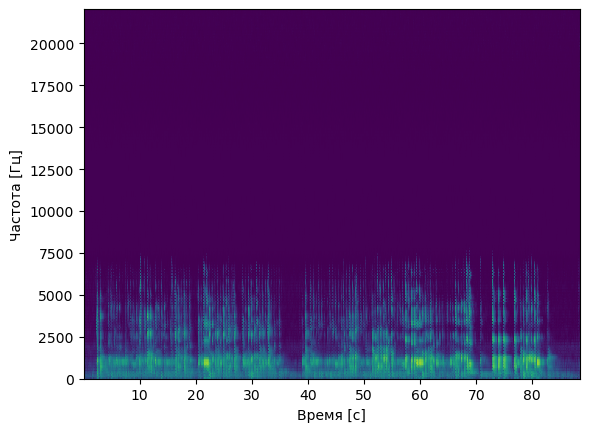

In [21]:
def main():
    input_path = 'input'
    output_path = 'output'
    os.makedirs(output_path, exist_ok=True)

    sample_rate, data = wavfile.read(input_path + '/' + 'music.wav')

    make_butter_filter(sample_rate, data, output_path)

    make_savgol_filter(sample_rate, data, output_path)

    get_peaks(sample_rate, data, output_path)

if __name__ == "__main__":
    main()
